Aujourd'hui, j'ai eu une discussion avec un étudiant qui se lance dans le domaine de l'apprentissage automatique. Il souhaite réaliser le fine-tuning d'un modèle de conversion de la parole en texte en utilisant les données que nous avons collectées dans le cadre du projet Sueza (une description du projet est disponible).

L'étudiant se demandait pourquoi il était préférable d'opter pour le fine-tuning des modèles pré-entraînés plutôt que de créer un modèle à partir de zéro, étant donné que des ajustements de poids seraient nécessaires dans les deux cas.

Pour l'aider à saisir cette problématique, j'ai utilisé une analogie. J'ai posé la question suivante : "Si tu devais enseigner à un élève de CM2 à dériver une fonction, par où commenceriez-vous et combien de temps cela prendrait-il ?"

L'étudiant a répondu qu'il commencerait par enseigner les opérateurs mathématiques, suivi des opérations sur les fonctions, car il serait essentiel d'acquérir ces bases de manière progressive. Il a également souligné que cela demanderait beaucoup de temps, car l'élève devrait assimiler chaque concept de manière séquentielle.

J'ai ensuite demandé combien de temps cela prendrait si l'élève était en classe de seconde, étant donné qu'il aurait déjà acquis les notions de base en mathématiques pour comprendre les fonctions. L'étudiant a estimé qu'un mois serait suffisant, car l'élève aurait déjà une connaissance des nombres et des opérations mathématiques de base, ce qui faciliterait l'apprentissage des fonctions.

Je lui es dit qu'il avait déjà la réponse à sa question concernant le fine-tuning. Je lui est fait remarquer que le modèle pré-entraîné était capable de reconnaître des formes, des lettres et d'autres éléments, ce qui lui conférait un avantage pour apprendre des concepts plus complexes dans cet espace. En revanche, si l'on partait d'un modèle à construire à partir de zéro, comme l'élève de CM2, non seulement cela prendrait plus de temps pour le former, mais il aurait également besoin de plus de données. Sinon, le modèle risquerait de mémoriser plutôt que d'apprendre, ce qui pourrait entraîner un phénomène de surajustement (overfitting). Cette explication avait donc pour but de souligner l'efficacité du fine-tuning par rapport à la création d'un modèle à partir de zéro, en utilisant les connaissances préalablement acquises par le modèle pré-entraîné.

## Entrainner un model de regression linear definit par $y=ax$

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import time

from colorama import Fore, Back, Style

In [75]:
class model():
    def __init__(self, lr):
        self.weight = np.random.randn(1)# initialize the weight with random number 
        self.lr = lr
        self.loss = 0
        print(f"Weight is {self.weight}")

    def forward(self,x)->np.array:
        return x*self.weight
    
    def getweight(self)->np.float16:
        return self.weight[0]
    
    def MSE(self,x,y)-> np.float16:
        self.loss += (x*(self.forward(x) - y).T).mean()
        return self.loss
    
    def zerograd(self)->None:
        self.loss = 0

    def update_model(self)->None:
        self.weight = self.weight-self.lr*self.loss

In [76]:
# each time we calle np.random.randn(1) we start with different value
for i in range(10):
    print(np.random.randn(1))

[-1.84735974]
[0.58748589]
[0.14796749]
[-0.6639931]
[1.61678111]
[0.55350036]
[-0.44343044]
[0.98492122]
[2.32183864]
[0.45571089]


Our dataset for the training: 

In [77]:
x = np.array([1,2,3,10,9,11])
y = np.array([2,4,6,20,18,22])

In [78]:
lr = 0.001
net= model(lr)

Weight is [0.64223291]


In [79]:
net.forward(x)

array([0.64223291, 1.28446583, 1.92669874, 6.42232914, 5.78009623,
       7.06456206])

Weight is [0.36407681]
la valeur predite est : f(11)=4.00484486506932
epoch= 10, erreur=22.659, poids=0.867068
epoch= 20, erreur=15.064, poids=1.246790
epoch= 30, erreur=10.015, poids=1.499241
epoch= 40, erreur=6.658, poids=1.667079
epoch= 50, erreur=4.427, poids=1.778663
epoch= 60, erreur=2.943, poids=1.852848
epoch= 70, erreur=1.957, poids=1.902169
epoch= 80, erreur=1.301, poids=1.934959
epoch= 90, erreur=0.865, poids=1.956758
epoch= 100, erreur=0.575, poids=1.971252
epoch= 110, erreur=0.382, poids=1.980887
epoch= 120, erreur=0.254, poids=1.987293
epoch= 130, erreur=0.169, poids=1.991552
epoch= 140, erreur=0.112, poids=1.994384
epoch= 150, erreur=0.075, poids=1.996266
epoch= 160, erreur=0.050, poids=1.997518
epoch= 170, erreur=0.033, poids=1.998350
epoch= 180, erreur=0.022, poids=1.998903
epoch= 190, erreur=0.015, poids=1.999270
epoch= 200, erreur=0.010, poids=1.999515
52.9
train time is 0.010912179946899414
la valeur predite est : f(11)=21.995


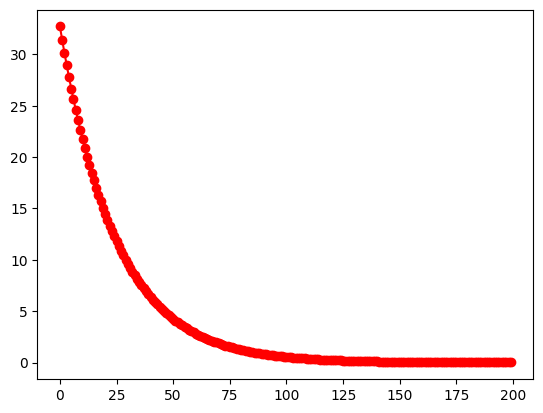

In [84]:
x = np.array([1,2,3,4,5,6,7])
y = np.array([2,4,6,8,10,12,14])
N_epoch = 200
learning_rate = 0.002
lr = learning_rate
net= model(lr)

los = np.array([])


start = time.time()

print(f'la valeur predite est : f(11)={net.forward(11)[0]}')
for epoch in range(N_epoch):
    
    w = net.getweight()
    l_w = -net.MSE(x,y)
    los=np.append(los,l_w)
    net.update_model()
    net.zerograd()
  
    if (epoch+1)%10 == 0:
        
        print(f'epoch= {epoch+1}, erreur={ l_w:.3f}, poids={w:f}')

print(23*2.3)

end = time.time()
print(Fore.RED +f'train time is {end - start}')


print(f'la valeur predite est : f(11)={net.forward(11)[0]:.3f}')
plt.plot(range(len(los)),los,'r-o',label='loss function')
plt.show()

4.0

# Entrainons le model partant de model entrainer precedant

la valeur predite est : f(11)=21.994878440730936
epoch= 10, erreur=0.006, poids=1.999678
epoch= 20, erreur=0.004, poids=1.999786
epoch= 30, erreur=0.003, poids=1.999857
epoch= 40, erreur=0.002, poids=1.999905
epoch= 50, erreur=0.001, poids=1.999937
epoch= 60, erreur=0.001, poids=1.999958
epoch= 70, erreur=0.001, poids=1.999972
epoch= 80, erreur=0.000, poids=1.999981
epoch= 90, erreur=0.000, poids=1.999988
epoch= 100, erreur=0.000, poids=1.999992
epoch= 110, erreur=0.000, poids=1.999995
epoch= 120, erreur=0.000, poids=1.999996
epoch= 130, erreur=0.000, poids=1.999998
epoch= 140, erreur=0.000, poids=1.999998
epoch= 150, erreur=0.000, poids=1.999999
epoch= 160, erreur=0.000, poids=1.999999
epoch= 170, erreur=0.000, poids=2.000000
epoch= 180, erreur=0.000, poids=2.000000
epoch= 190, erreur=0.000, poids=2.000000
epoch= 200, erreur=0.000, poids=2.000000
52.9
train time is 0.011882543563842773
la valeur predite est : f(11)=22.000


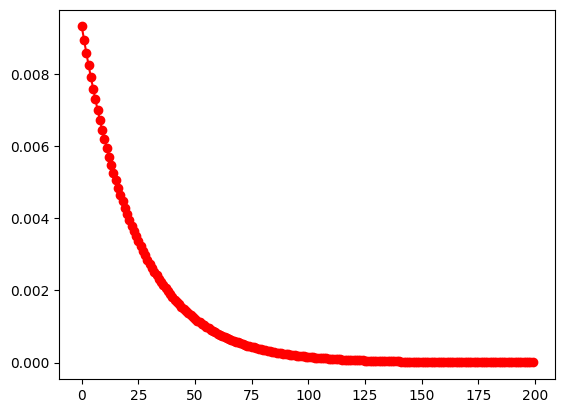

In [85]:
x = np.array([1,2,3,4,5,6,7])
y = np.array([2,4,6,8,10,12,14])
N_epoch = 200
learning_rate = 0.002
lr = learning_rate

los = np.array([])


start = time.time()

print(f'la valeur predite est : f(11)={net.forward(11)[0]}')
for epoch in range(N_epoch):
    
    w = net.getweight()
    l_w = -net.MSE(x,y)
    los=np.append(los,l_w)
    net.update_model()
    net.zerograd()
  
    if (epoch+1)%10 == 0:
        
        print(f'epoch= {epoch+1}, erreur={ l_w:.3f}, poids={w:f}')

print(23*2.3)

end = time.time()
print(Fore.RED +f'train time is {end - start}')


print(f'la valeur predite est : f(11)={net.forward(11)[0]:.3f}')
plt.plot(range(len(los)),los,'r-o',label='loss function')

on constate que le model atteint le point de convergence apres 170 epoch en utilisant le fine tuning. essayons d'entrainer le model pour 370 epoch pour voir le comportement. 

Weight is [-0.73045636]
la valeur predite est : f(11)=-8.035019989242317
epoch= 10, erreur=37.819, poids=0.109066
epoch= 20, erreur=25.143, poids=0.742845
epoch= 30, erreur=16.716, poids=1.164203
epoch= 40, erreur=11.113, poids=1.444335
epoch= 50, erreur=7.388, poids=1.630576
epoch= 60, erreur=4.912, poids=1.754395
epoch= 70, erreur=3.266, poids=1.836713
epoch= 80, erreur=2.171, poids=1.891442
epoch= 90, erreur=1.443, poids=1.927827
epoch= 100, erreur=0.960, poids=1.952017
epoch= 110, erreur=0.638, poids=1.968099
epoch= 120, erreur=0.424, poids=1.978791
epoch= 130, erreur=0.282, poids=1.985900
epoch= 140, erreur=0.187, poids=1.990626
epoch= 150, erreur=0.125, poids=1.993768
epoch= 160, erreur=0.083, poids=1.995857
epoch= 170, erreur=0.055, poids=1.997245
epoch= 180, erreur=0.037, poids=1.998169
epoch= 190, erreur=0.024, poids=1.998782
epoch= 200, erreur=0.016, poids=1.999191
epoch= 210, erreur=0.011, poids=1.999462
epoch= 220, erreur=0.007, poids=1.999642
epoch= 230, erreur=0.005, poid

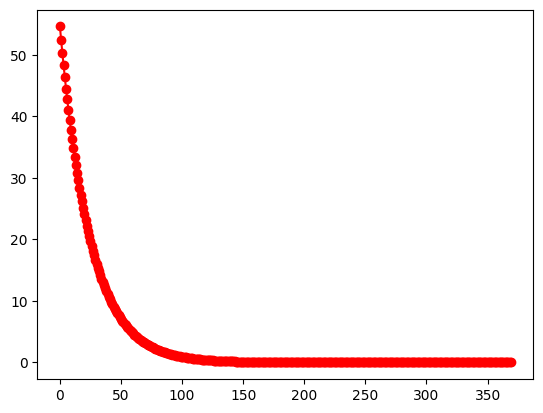

In [89]:
x = np.array([1,2,3,4,5,6,7])
y = np.array([2,4,6,8,10,12,14])
N_epoch = 370
learning_rate = 0.002
lr = learning_rate
net= model(lr)

los = np.array([])


start = time.time()

print(f'la valeur predite est : f(11)={net.forward(11)[0]}')
for epoch in range(N_epoch):
    
    w = net.getweight()
    l_w = -net.MSE(x,y)
    los=np.append(los,l_w)
    net.update_model()
    net.zerograd()
  
    if (epoch+1)%10 == 0:
        
        print(f'epoch= {epoch+1}, erreur={ l_w:.3f}, poids={w:f}')

print(23*2.3)

end = time.time()
print(Fore.RED +f'train time is {end - start}')


print(f'la valeur predite est : f(11)={net.forward(11)[0]:.3f}')
plt.plot(range(len(los)),los,'r-o',label='loss function')